In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier

In [2]:
#Split the Train Set & Test Set
#X_Test, X_train, Y_Test,Y_Train(Understanding Purpose In machine Learning we split tarin set and test set, indep_X, dep_Y, same set we using to split the Input-output)

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
#Above from Trainset X_Train.shape
#60,000-Total count of the Images
#28,28-rows and columns of each image

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
#Above from Testset X_Test.shape
#10,000-Total count of the Images
#28,28-rows and columns of each image

In [9]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [11]:
#Above (x_train.shape(0)-60,000 - Total count of Images
#28*28 - rows and colums of each image(Cube box Images it should be converted into Flatenning Images(Is converetd as single line i.e as "1")
#Here 1 - is the flatenning the Images(i.e-28*28- Matrix Cube box image will be convereted into flatenning Images)

In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [13]:
x_train /= 255
x_test /= 255

In [14]:
#Above info:
#X_train = X_train/255
#i.e that is 60,000/255 final answer we need to save in the same x_train & sam e for X_test

In [15]:
#To create a model for CNN for Sequential

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

C:\Users\sreet\anaconda3\envs\aidl\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
#Here Sequential is One ouput model to give for One Input Model and then input model move further to another Input model
#Dense is a neural network of Fully connected
#Here, Conv2D is use for Filter is nothing but here channel depth is collected the info
#channel depth is collected the information for Enhancing the Images(Enhancing:to increase or improve in value, quality, desirability, or attractiveness)
#Dense(128 is Neuron values)
#Dense(10 -we are classifying here for example we can classify also 20 here)
#Recall understanding purpose, the basics Concepts, In Interview purpose they will check basics
#For ex: Here CNN we activation function 'C' relu without string, but in ANN we give under inside the string so we need to recalll the basics concept
#Refer #https://keras.io/api/ the basics steps activation function need to recall
#Recall the ANN Visual Video from 3 Blue 1 Brown

In [18]:
#https://keras.io/api/optimizers/
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8927 - loss: 0.3585
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9732 - loss: 0.0865
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9826 - loss: 0.0550
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9871 - loss: 0.0399
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9893 - loss: 0.0328
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9907 - loss: 0.0270
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9926 - loss: 0.0220
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9918 - loss: 0.0231
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9947 - loss: 0.0165
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9944 - loss: 0.0172


In [27]:
#If Epoch value Increases, Th accuracy value also increases, and Loss value also Decreses
#"Reminder": Epoch means forward and Backward(i.e- preforward and backward propagation)

In [28]:
#Evaluate the model for x_test & y_test

In [29]:
model.evaluate(x_test, y_test)

ValueError: Could not interpret metric identifier: classification

In [30]:
#Here X_test is loss, Y_test is Accuracy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
6


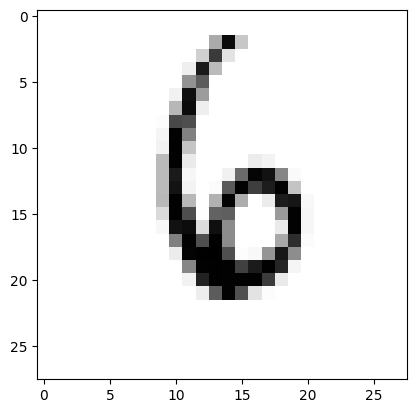

In [31]:
import matplotlib.pyplot as plt
image_index = 6900
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())